**ROC - AUC**

- ROC = Reciever operating characteristic

- AUC = Area under curve

*X-axis = FP rate (False positive = actually negative, predicted as positive)*

*Y-axis = TP rate (True positive = actually positive, predicted as positive)*

Curve should be closer to y-axis (TP rate) - higher area under curve

- Only possible for binary classification problem

ROC-AUC Score - between 0 to 1 (better if nearer to 1)

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('D:\SEM 4\Supervised Machine Learning Lab\\iphone_purchase_records.csv')
print(df.shape)
df.head()

(400, 4)


,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

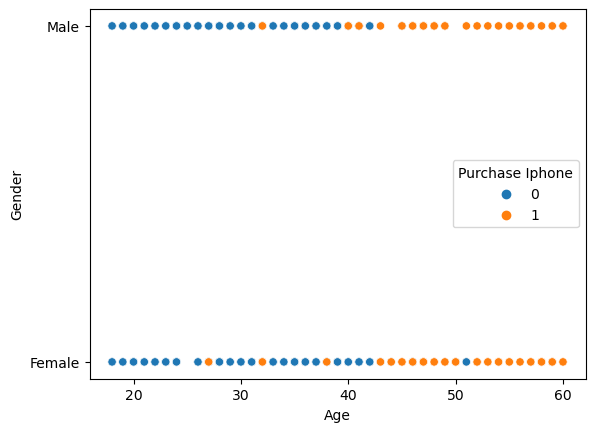

In [4]:
import seaborn as sns 
sns.scatterplot(data = df, x = 'Age', y = 'Gender', hue = 'Purchase Iphone');

In [5]:
df.replace(['Male','Female'],[0,1],inplace = True) # or label encoding

In [6]:
X = df.iloc[:,:-1].values
y = df.iloc[:,3:].values

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 0)

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [9]:
y_pred = clf.predict(x_test)

In [10]:
y_score = clf.predict_proba(x_test)[:,1] # probability of classification/prediction

In [11]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,y_pred)
print("Confusion matrix: \n")
print(cm)

accuracy = metrics.accuracy_score(y_test,y_pred)
print("\nAccuracy score: ", accuracy)

precision = metrics.precision_score(y_test,y_pred)
print("\nPrecision score: ", precision)

recall = metrics.recall_score(y_test,y_pred)
print("\nRecall score: ", recall)

Confusion matrix: 

[[57  7]
 [ 7 29]]

Accuracy score:  0.86

Precision score:  0.8055555555555556

Recall score:  0.8055555555555556


In [12]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test,y_score)

The points lie between (0,0) to (1,1)

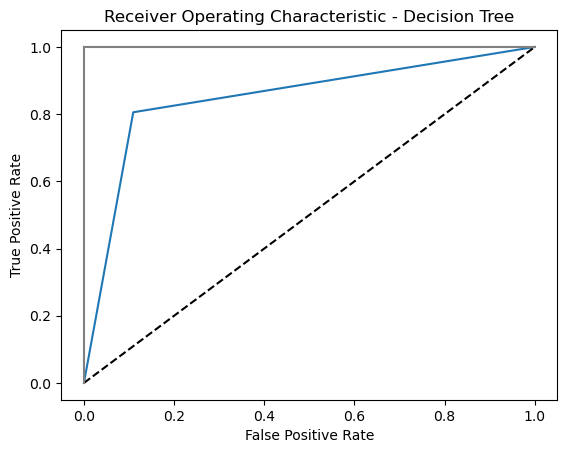

In [13]:
fig, ax = plt.subplots()
ax.set_title('Receiver Operating Characteristic - Decision Tree')
ax.plot(false_positive_rate1, true_positive_rate1) # will give the blue line
ax.plot([0,1], ls = '--', color = 'black') # diagonal line - joins the end points
ax.plot([0, 0], [1, 0], color = 'gray'), ax.plot([1, 1], color = 'gray') # gray axis lines for reference
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.show()

In [14]:
roc_auc = roc_auc_score(y_test,y_score)
print('ROC AUC Score: ', round(roc_auc,4))

ROC AUC Score:  0.8481
